In [35]:
cd /home

/home


In [48]:
from src.models import get_ASTROMER_II, build_input_2
from presentation.experiments.astromer_2.utils import (load_clf_data, 
                                                       create_classifier)
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
class CONFIG:
    window_size=200
    nsp_prob=0.5
    nsp_fraction=0.5
    subdataset= 'atlas'
    fold=0
    head_dim=64
    n_heads=4
    n_layers=1
    dff=64
    dropout_rate=.395
    window_size=200
    clf_name='mlp_cls'
    
config = CONFIG()

DOWNSTREAM_DATA = os.path.join('./data/records', 
                               config.subdataset,
                               'fold_'+str(config.fold), 
                               config.subdataset+'_20')
num_cls = pd.read_csv(
        os.path.join(DOWNSTREAM_DATA, 'objects.csv')).shape[0]

loader = load_clf_data(config, 
                       batch_size=512, 
                       num_cls=num_cls, 
                       datapath=DOWNSTREAM_DATA)

placeholder = build_input_2(config.window_size+3)

[INFO] Repeating dataset x1 times
[INFO] Loading PT task: Masking
[INFO] Loading PT task: NSP
[INFO] Mov. win:  False
[INFO] Repeating dataset x1 times
[INFO] Loading PT task: Masking
[INFO] Loading PT task: NSP
[INFO] Mov. win:  False
[INFO] Repeating dataset x1 times
[INFO] Loading PT task: Masking
[INFO] Loading PT task: NSP
[INFO] Mov. win:  False


In [54]:
d_model = config.head_dim*config.n_heads
astromer =  get_ASTROMER_II(num_layers=config.n_layers,
                            d_model=d_model,
                            num_heads=config.n_heads,
                            dff=config.dff,
                            base=10000,
                            dropout=config.dropout_rate,
                            maxlen=config.window_size,
                            pe_c=2) 

PE_C RECEIVED:  tf.Tensor(2.0, shape=(), dtype=float32)


In [55]:
clf_model = create_classifier(astromer, 
                              config, 
                              num_cls=num_cls, 
                              train_astromer=False, 
                              name=config.clf_name)

(81, 5)


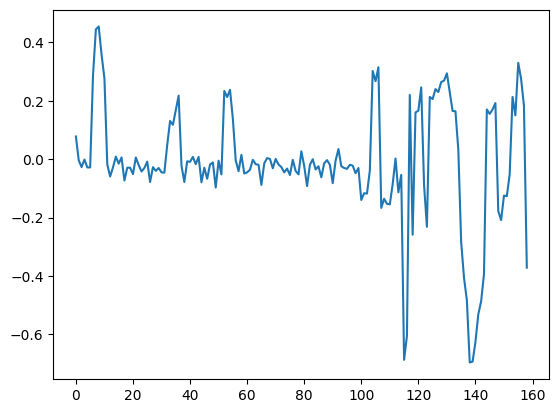

In [56]:
for x, _ in loader['train']:
    
    a = tf.boolean_mask(x['input'][0], x['mask_out'][0])
    plt.plot(a)
    
    y_pred = clf_model(x)
    
    print(y_pred.shape)